<a href="https://colab.research.google.com/github/shuodeng521-sys/NEW_REPO/blob/main/HW4-shuo%20deng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW4
ST554;
Shuo Deng

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
#read in data
student_data=pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/StudentData.txt", sep=";")
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
#Create a one-way contingency table: summarize the category of the female job and countfor each category
FjobC_counts=student_data["Fjob"].value_counts(dropna=False)
FjobC_counts

,count
Fjob,
other,217
services,111
teacher,29
at_home,20
health,18


In [ ]:
#Create two way contingency table: summarize parent status in the 2 schools
school_Pstatus_data=pd.crosstab(student_data.school,student_data.Pstatus)
school_Pstatus_data

Pstatus,A,T
school,,
GP,38,311
MS,3,43


In [ ]:
#create three way data: summarize Parent status in 2 schools and female and male
school_sexPstatus_data=pd.crosstab([student_data.school,student_data.sex],student_data.Pstatus)
school_sexPstatus_data

Pstatus      A    T
school sex         
GP     F    21  162
       M    17  149
MS     F     2   23
       M     1   20

In [ ]:
#Create a conditional two-way table; subsetting the data (say with .loc) and then creating the two-way table
sub_student_data=student_data.loc[student_data["sex"]=="F",:]
twoway_data=pd.crosstab([sub_student_data.school,sub_student_data.sex],sub_student_data.Pstatus)
twoway_data

,Pstatus,A,T
school,sex,,
GP,F,21,162
MS,F,2,23


In [ ]:
#Create a conditional two-way table, by creating a three-way table and subsetting it
threeway_data=pd.crosstab([student_data.school,student_data.sex],student_data.Pstatus)
threeway_data
sub_threeway_data=threeway_data.loc[(slice(None), 'F'), :]
sub_threeway_data

,Pstatus,A,T
school,sex,,
GP,F,21,162
MS,F,2,23


In [ ]:
#Find measures of center and spread for three of these variables,"age", "absences", "G3"
student_data[["age", "absences", "G3"]].agg(["mean", "std"])

,age,absences,G3
mean,16.696203,5.708861,10.415190
std,1.276043,8.003096,4.581443


In [ ]:
#Find measures of center and spread for age,absences and G3 while only sex=female
student_data.loc[student_data.sex == "F", ["age", "absences", "G3"]] \
            .agg(["mean", "std"])

,age,absences,G3
mean,16.730769,6.216346,9.966346
std,1.201696,9.445819,4.622338


In [ ]:
#Find measures of center and spread for female and male
student_data.groupby("sex")[["age", "absences", "G3"]] \
            .agg(["mean", "std"])

age            absences                   G3          
          mean       std      mean       std       mean       std
sex                                                              
F    16.730769  1.201696  6.216346  9.445819   9.966346  4.622338
M    16.657754  1.356181  5.144385  5.980749  10.914439  4.495297

In [ ]:
#Find measures of center and spread for fmale and male in different schools
student_data.groupby(["sex", "school"])[["age", "absences", "G3"]] \
            .agg(["mean", "std"])

age            absences                   G3          
                 mean       std      mean       std       mean       std
sex school                                                              
F   GP      16.579235  1.173426  6.639344  9.852259   9.972678  4.604622
    MS      17.840000  0.746101  3.120000  4.702127   9.920000  4.846992
M   GP      16.457831  1.263005  5.222892  6.215695  11.060241  4.594725
    MS      18.238095  0.995227  4.523810  3.669047   9.761905  3.491486

In [ ]:
#Create a correlation matrix between all of the numeric variables
correlation_data = student_data[["age", "absences", "G1", "G2", "G3"]].corr()
print(correlation_data)

               age  absences        G1        G2        G3
age       1.000000  0.175230 -0.064081 -0.143474 -0.161579
absences  0.175230  1.000000 -0.031003 -0.031777  0.034247
G1       -0.064081 -0.031003  1.000000  0.852118  0.801468
G2       -0.143474 -0.031777  0.852118  1.000000  0.904868
G3       -0.161579  0.034247  0.801468  0.904868  1.000000


# HW4

In [35]:
#create Catagorical variable FjobCand create 2 way contingency table
student_data["FjobC"] = student_data.Fjob.astype("category")
FjobC_counts=pd.crosstab(student_data.FjobC,student_data.sex)
FjobC_counts


sex,F,M
FjobC,,
at_home,14,6
health,12,6
other,111,106
services,58,53
teacher,13,16


#Catagorical variables
stacked bar plot :

Text(0.5, 1.0, "the frequency of father's job in Male and Female students")

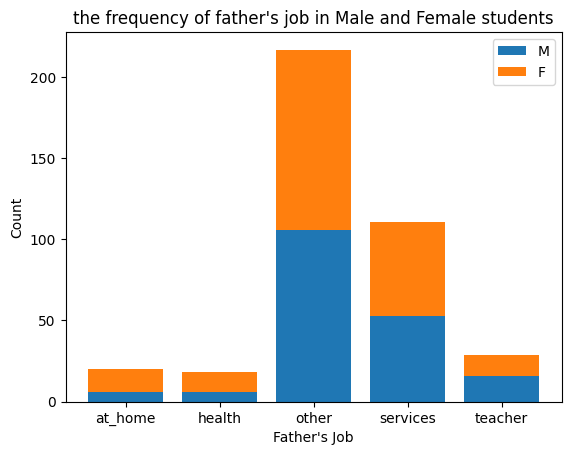

In [33]:

student_data["FjobC"] = student_data.Fjob.astype("category")
FjobC_counts = pd.crosstab(student_data.FjobC, student_data.sex)
categories = FjobC_counts.index
plt.bar(categories, FjobC_counts["M"], label="M")
plt.bar(categories, FjobC_counts["F"], bottom=FjobC_counts["M"], label="F")
plt.xlabel("Father's Job")
plt.ylabel("Count")
plt.legend()
plt.title("the frequency of father's job in Male and Female students")

The above diagram indicate that the distribution of father’s jobs is nearly the same for male and female students, with no major differences between the groups.

side by side bar plot

Text(0.5, 1.0, "the frequency of father's job in Male and Female students")

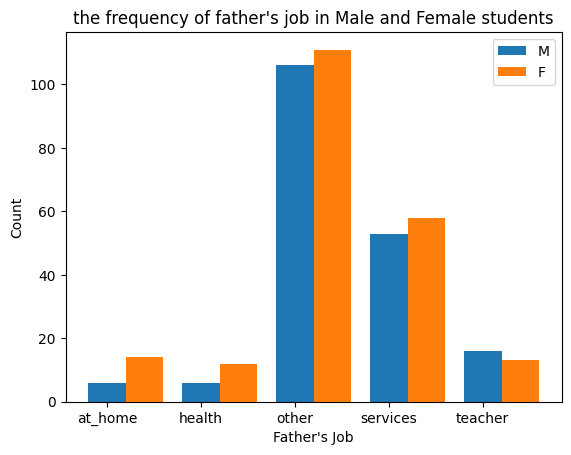

In [32]:
plt.bar(x=[1,2,3,4,5],
        height=FjobC_counts.loc[:,"M"],
        width=0.4,
        label="M")
plt.bar(x=[1.4,2.4,3.4,4.4,5.4],
        height=FjobC_counts.loc[:,"F"],
        width=0.4,
        label="F")
plt.xticks([1,2,3,4,5], student_data.FjobC.cat.categories)
plt.xlabel("Father's Job")
plt.ylabel("Count")
plt.legend()
plt.title("the frequency of father's job in Male and Female students")

#Numeric Cariables(and across groups)
Histogram

Text(0.5, 1.0, 'Histogram of absences for Female and Male students')

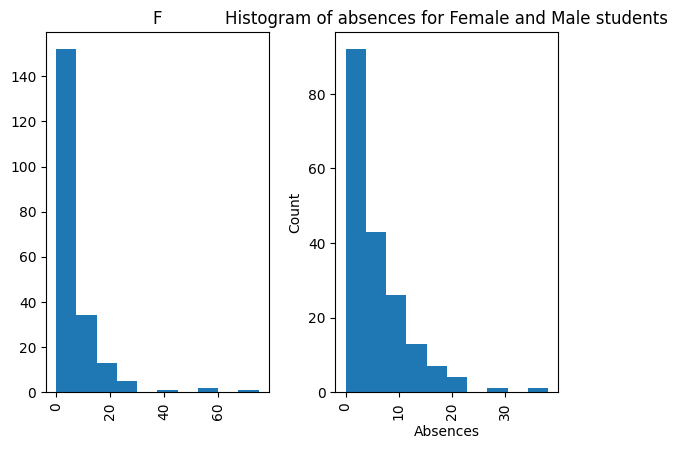

In [54]:
student_data.hist(column="absences",by="sex")
plt.xlabel("Absences")
plt.ylabel("Count")
plt.title("Histogram of absences for Female and Male students")

Above histogram indicate that Female and male students show very similar absence patterns. Both groups have many students with low absences and a long tail of students with higher absences, with no major difference between the two sexes.

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]


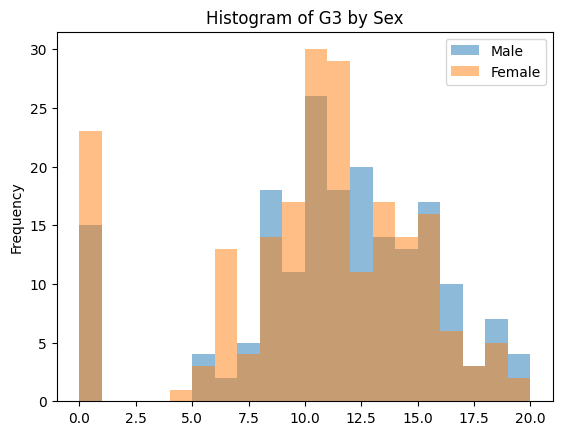

In [51]:
bin_ends = 20
bins = [i*max(student_data.G3)/
      bin_ends for i in range(0, bin_ends + 1)]
print(bins)
student_data["sexC"] = student_data.sex.astype("category")
G3_M=student_data.loc[student_data.sexC =="M","G3"]
G3_F=student_data.loc[student_data.sexC == "F","G3"]
G3_M.plot.hist(bins=bins, alpha=0.5, label="Male",
       title="Histogram of G3 by Sex").set(xlabel="Age")
G3_F.plot.hist(bins=bins, alpha=0.5, label="Female")
plt.legend()

Above histogram indicate that Male and female students have very similar G3 score distributions. Both groups cluster around the same score ranges, and neither sex consistently scores higher or lower than the other.

Kernel density plot for for G3 by Sex

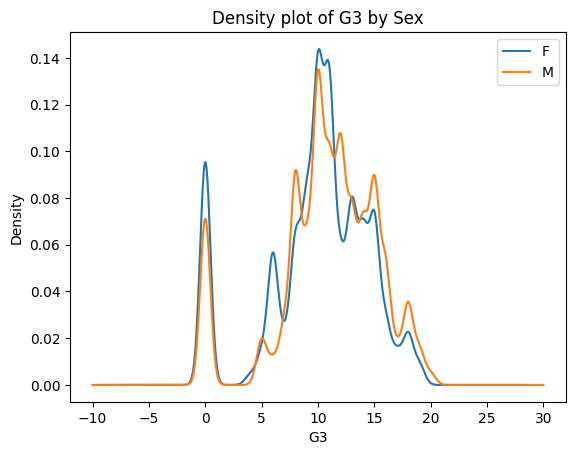

In [64]:
for group in student_data.sexC.cat.categories:
  student_data[student_data.sex == group].G3.plot.density(bw_method=0.1, label=group )
  plt.title("Density plot of G3 by Sex")
  plt.xlabel("G3")
  plt.legend()

Kernel density plot for Absences by Sex

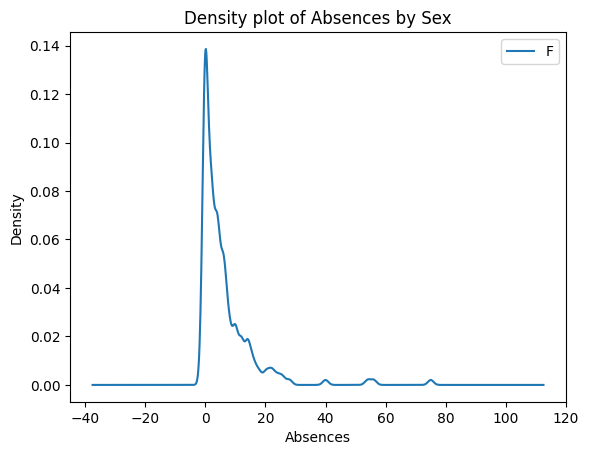

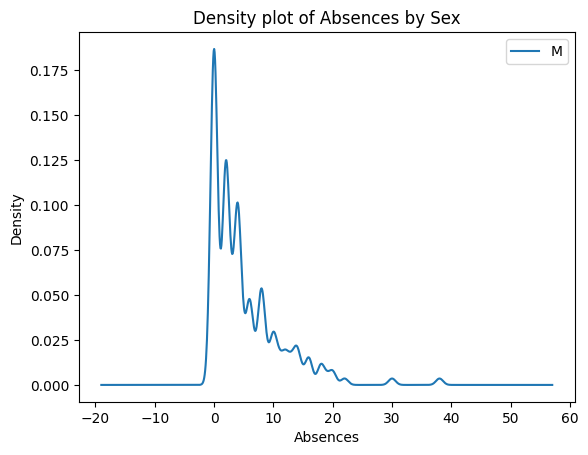

In [66]:
for group in student_data.sexC.cat.categories:
  student_data[student_data.sex == group].absences.plot.density(bw_method=0.1, label=group )
  plt.title("Density plot of Absences by Sex")
  plt.xlabel("Absences")
  plt.legend()
  plt.show()

The above density curves shows Male and female students have almost identical absence distributions. The density curves overlap closely, showing no meaningful difference in how often each group is absent.

Boxplot

Text(0.5, 0, 'Sex')

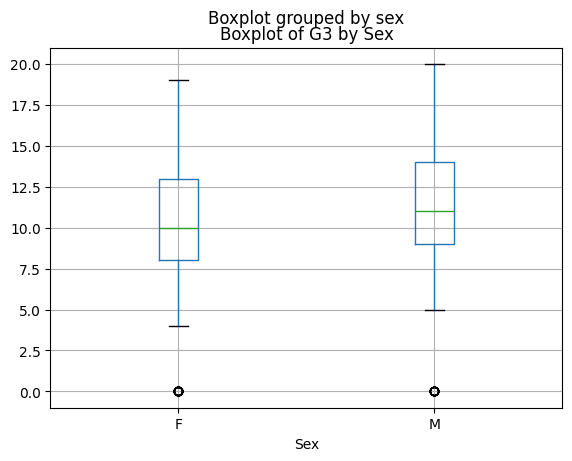

In [70]:
student_data.boxplot(column="G3", by="sex")
plt.title("Boxplot of G3 by Sex")
plt.xlabel("Sex")



  
The boxplot shows that male and female students have almost identical G3 score distributions. Their medians, spreads, and overall ranges are very similar, indicating no meaningful difference in final grades between the two groups.

Text(0.5, 0, 'Sex')

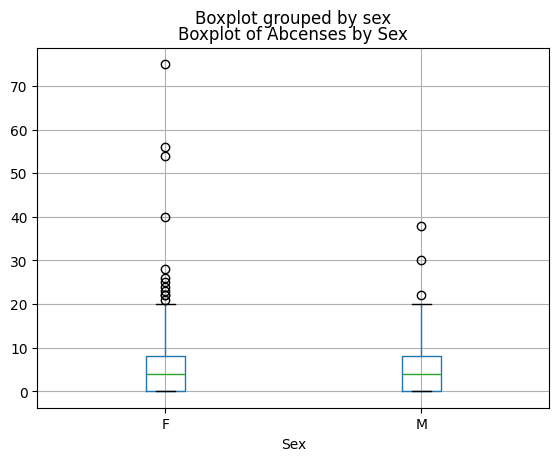

In [71]:
student_data.boxplot(column="absences", by="sex")
plt.title("Boxplot of Abcenses by Sex")
plt.xlabel("Sex")


Male and female students have very similar absence distributions. Their medians and overall spread are nearly the same, showing no meaningful difference in absences between the two groups.

Scatter Plots

Text(0, 0.5, 'G3')

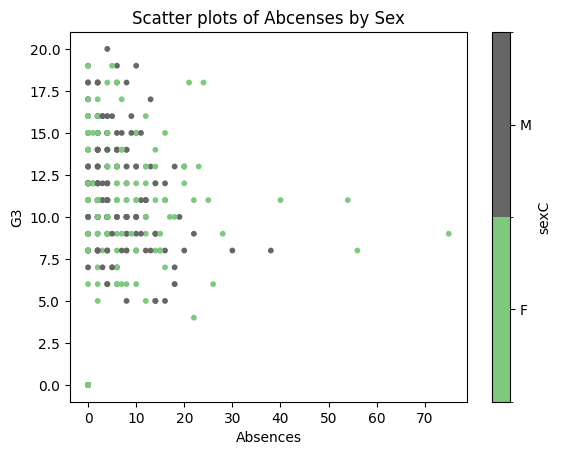

In [82]:
student_data.plot.scatter(x="absences", y="G3",c="sexC",cmap="Accent", s=10)
plt.title("Scatter plots of Abcenses by Sex")
plt.xlabel("Absences")
plt.ylabel("G3")

There is no strong relationship between absences and G3 scores. Students with both high and low absences appear across the full range of G3 values, and males and females show similar patterns with no clear separation between the groups.

Text(0, 0.5, 'G3')

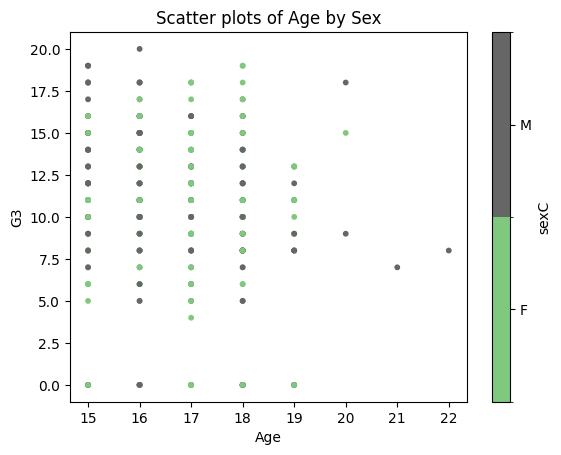

In [83]:
student_data.plot.scatter(x="age", y="G3",c="sexC",cmap="Accent", s=10)
plt.title("Scatter plots of Age by Sex")
plt.xlabel("Age")
plt.ylabel("G3")

G3 scores do not show a strong relationship with age. Students of different ages achieve similar G3 values, and males and females follow the same overall pattern.

#Plotting the NFL Data

In [8]:
#read in data
scores = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv")
scores.head()

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,0,7,56,6,10,1,2,34.40,8,6.0


In [7]:
# convert to category type
for col in ["homeTeam", "awayTeam", "day", "stadium", "startTime", "toss", "roof", "surface"]:
    scores[col + "C"] = scores[col].astype("category")

#Summarize the data

In [14]:
#prepare the data; remove data which is not week 1-17
scores["weekN"] = pd.to_numeric(scores["week"], errors="coerce")
temp = {"week": (scores["weekN"] >= 1) & (scores["weekN"] <= 17)}
sub_scores = scores.loc[temp["week"]]

In [16]:
scores.columns

Index(['week', 'date', 'day', 'season', 'awayTeam', 'AQ1', 'AQ2', 'AQ3', 'AQ4',
       'AOT', 'AOT2', 'AFinal', 'homeTeam', 'HQ1', 'HQ2', 'HQ3', 'HQ4', 'HOT',
       'HOT2', 'HFinal', 'stadium', 'startTime', 'toss', 'roof', 'surface',
       'duration', 'attendance', 'weather', 'vegasLine', 'OU', 'AfirstDowns',
       'AnetPassYds', 'AtotalYds', 'Aturnovers', 'AtotalPlays', 'HfirstDowns',
       'HnetPassYds', 'HtotalYds', 'Hturnovers', 'HtotalPlays', 'OUvalue',
       'OUresult', 'awayRushAtt', 'awayRushYds', 'awayRushTD', 'awayPassComp',
       'awayPassAtt', 'awayPassYds', 'awayPassTD', 'awayPassInt',
       'awayTimesSacked', 'awaySackYdsLost', 'awayFum', 'awayFumLost',
       'awayNumPen', 'awayPenYds', 'away3rdConv', 'away3rdAtt', 'away4thConv',
       'away4thAtt', 'awayTOP', 'homeRushAtt', 'homeRushYds', 'homeRushTD',
       'homePassComp', 'homePassAtt', 'homePassYds', 'homePassTD',
       'homePassInt', 'homeTimesSacked', 'homeSackYdsLost', 'homeFum',
       'homeFumLost', 'h

In [19]:
#common numeric summaries of variables across these different groups.
HFinal_week_season= scores.groupby(["season", "weekN"])["HFinal"].agg( ["mean", "median", "std", "min", "max", "count"] )
HFinal_week_season

mean  median        std  min  max  count
season weekN                                               
2002   1.0    26.125000    27.0  11.050641    6   49     16
       2.0    18.187500    16.5  10.387292    0   39     16
       3.0    24.428571    27.0  11.460395    3   44     14
       4.0    28.285714    27.0  14.187907    7   52     14
       5.0    23.214286    25.5   8.441460    6   37     14
...                 ...     ...        ...  ...  ...    ...
2014   13.0   27.312500    27.5  14.012940    3   52     16
       14.0   19.750000    19.0  10.908712    0   43     16
       15.0   18.437500    18.0   9.750000    0   41     16
       16.0   22.937500    23.0  11.227756    3   42     16
       17.0   20.500000    20.0  10.013324    3   47     16

[221 rows x 6 columns]

In [21]:
#common numeric summaries of variables across these different groups.
HFinal_week= scores.groupby("weekN")["HFinal"].agg( ["mean", "median", "std", "min", "max", "count"] )
HFinal_week

,mean,median,std,min,max,count
weekN,,,,,,
1.0,22.139423,20.5,10.595541,0,49,208
2.0,22.840580,23.0,9.842384,0,51,207
3.0,22.646465,23.0,10.153955,0,56,198
4.0,24.092391,23.0,10.874704,0,56,184
5.0,24.324176,24.0,10.158379,3,52,182
6.0,22.988950,23.0,9.254422,3,59,181
7.0,23.338889,23.0,10.948924,0,62,180
8.0,23.359551,23.0,10.573121,0,52,178
9.0,22.258427,21.5,9.152849,0,55,178


In [22]:
#common numeric summaries of variables across these different groups.
HFinal_season= scores.groupby("season")["HFinal"].agg( ["mean", "median", "std", "min", "max", "count"] )
HFinal_season

,mean,median,std,min,max,count
season,,,,,,
2002,23.018727,23.0,10.295065,0,52,267
2003,22.677903,23.0,10.105887,0,50,267
2004,22.906367,23.0,10.441145,0,58,267
2005,22.314607,21.0,9.772905,0,52,267
2006,21.258427,20.0,9.876525,0,48,267
2007,23.157303,22.0,10.500518,3,56,267
2008,23.183521,23.0,10.414349,0,56,267
2009,22.779026,23.0,10.788110,0,59,267
2010,23.000000,23.0,10.230060,0,49,267


Text(0, 0.5, 'Average Home Score')

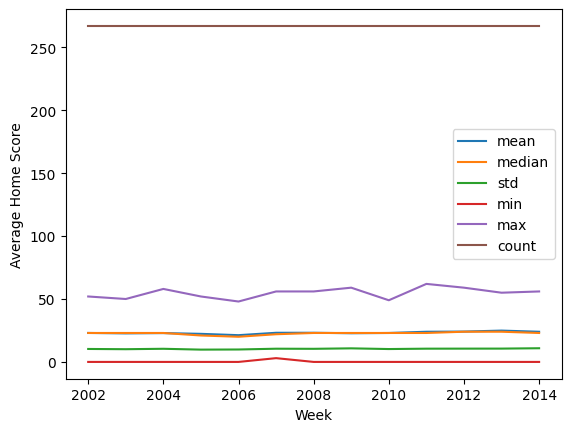

In [ ]:
#plots
HFinal_season.plot()
title="Average Home Final Score by season"
plt.xlabel("season")
plt.ylabel("Average Home Score")

Above indicate: The average home score varies noticeably across seasons, with some seasons showing stronger home‑team performance than others. This indicates that scoring levels change from year to year rather than staying constant.

Text(0, 0.5, 'Average Home Score')

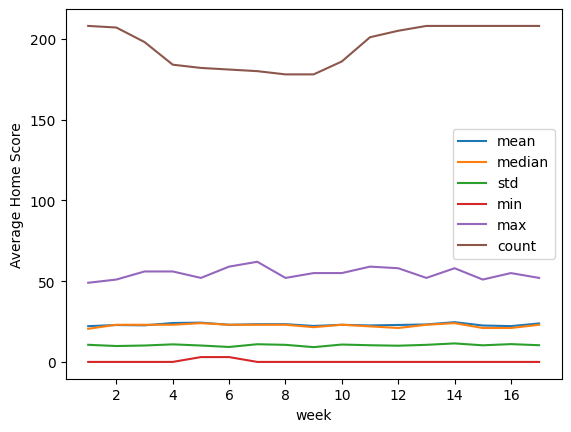

In [31]:
HFinal_week.plot()
title="Average Home Final Score by week"
plt.xlabel("week")
plt.ylabel("Average Home Score")

above diagram shows :average home scores tend to increase as the season moves forward, showing a gradual upward trend across the weeks.

Text(0, 0.5, 'Average Home Score')

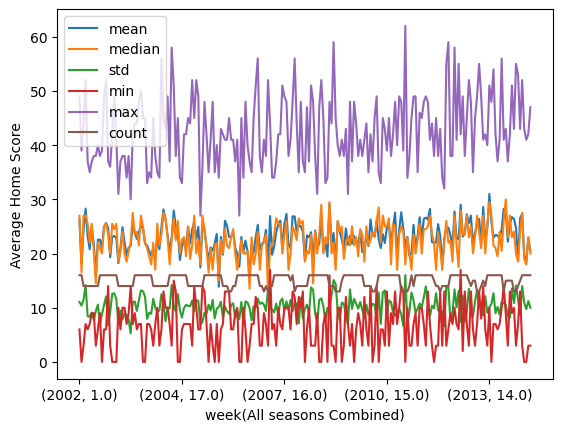

In [34]:
HFinal_week_season.plot()
title="Average Home Final Score by week(All seasons Combined)"
plt.xlabel("week(All seasons Combined)")
plt.ylabel("Average Home Score")

above diagam shows Across all seasons combined, home‑team scoring generally increases as the week number rises, showing a steady upward trend throughout the season.

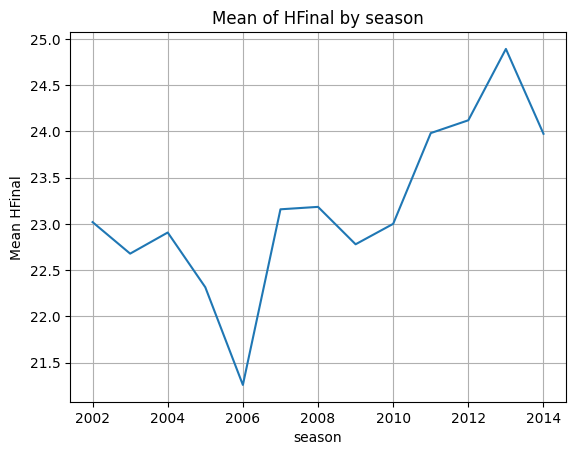

plot_stat ran in 0.221575 seconds


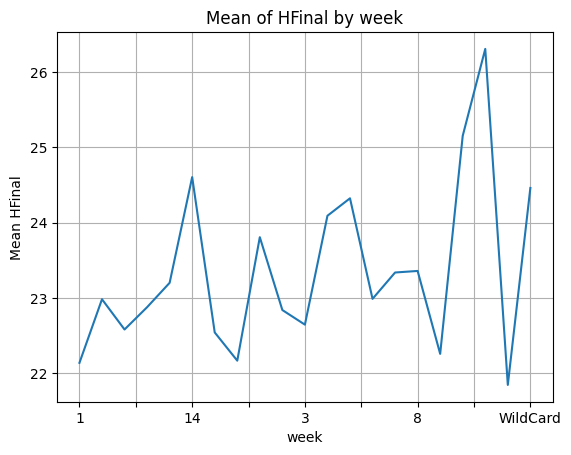

plot_stat ran in 0.128724 seconds


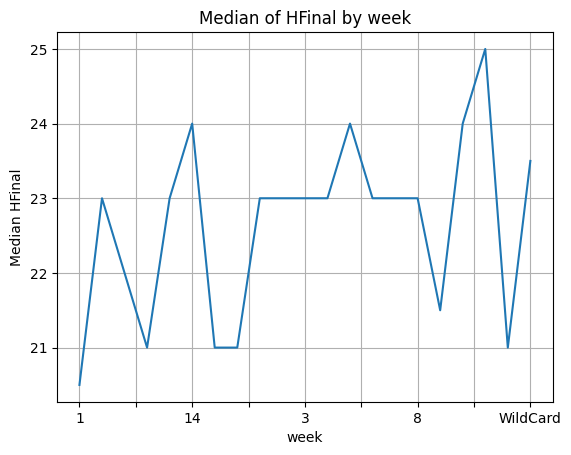

plot_stat ran in 0.143948 seconds


In [14]:
#create timeit
import time
from functools import wraps

def timeit(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        result = func(*args, **kwargs)
        end = time.perf_counter()
        elapsed = end - start
        print(f"{func.__name__} ran in {elapsed:.6f} seconds")
        return result
    return wrapper
@timeit
#define a function which can generate plot with different variables
def plot_stat(df: pd.DataFrame, numeric_var: str,
              group_var: str, method: str = None):
    """
    Plot a statistic of a numeric variable by a categorical variable.
    """
    group=df.groupby(group_var)[numeric_var].agg(method).plot()
    plt.title(f"{method.capitalize()} of {numeric_var} by {group_var}")
    plt.xlabel(group_var)
    plt.ylabel(f"{method.capitalize()} {numeric_var}")
    plt.grid(True)
    plt.show()
plot_stat(scores, "HFinal", "season", "mean")
plot_stat(scores, "HFinal", "week", "mean")
plot_stat(scores, "HFinal", "week", "median")

Plot 1: Home scores peak in 2013–2014 and are lowest in 2006, showing clear differences in scoring levels across seasons.
Plot 2: Home scores show a gradual upward trend as the season progresses.
Plot 3:The median score is more stable than the mean, meaning weekly scoring has some outliers that affect the average but not the median.